In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science', 'ieee'])

## Random agent

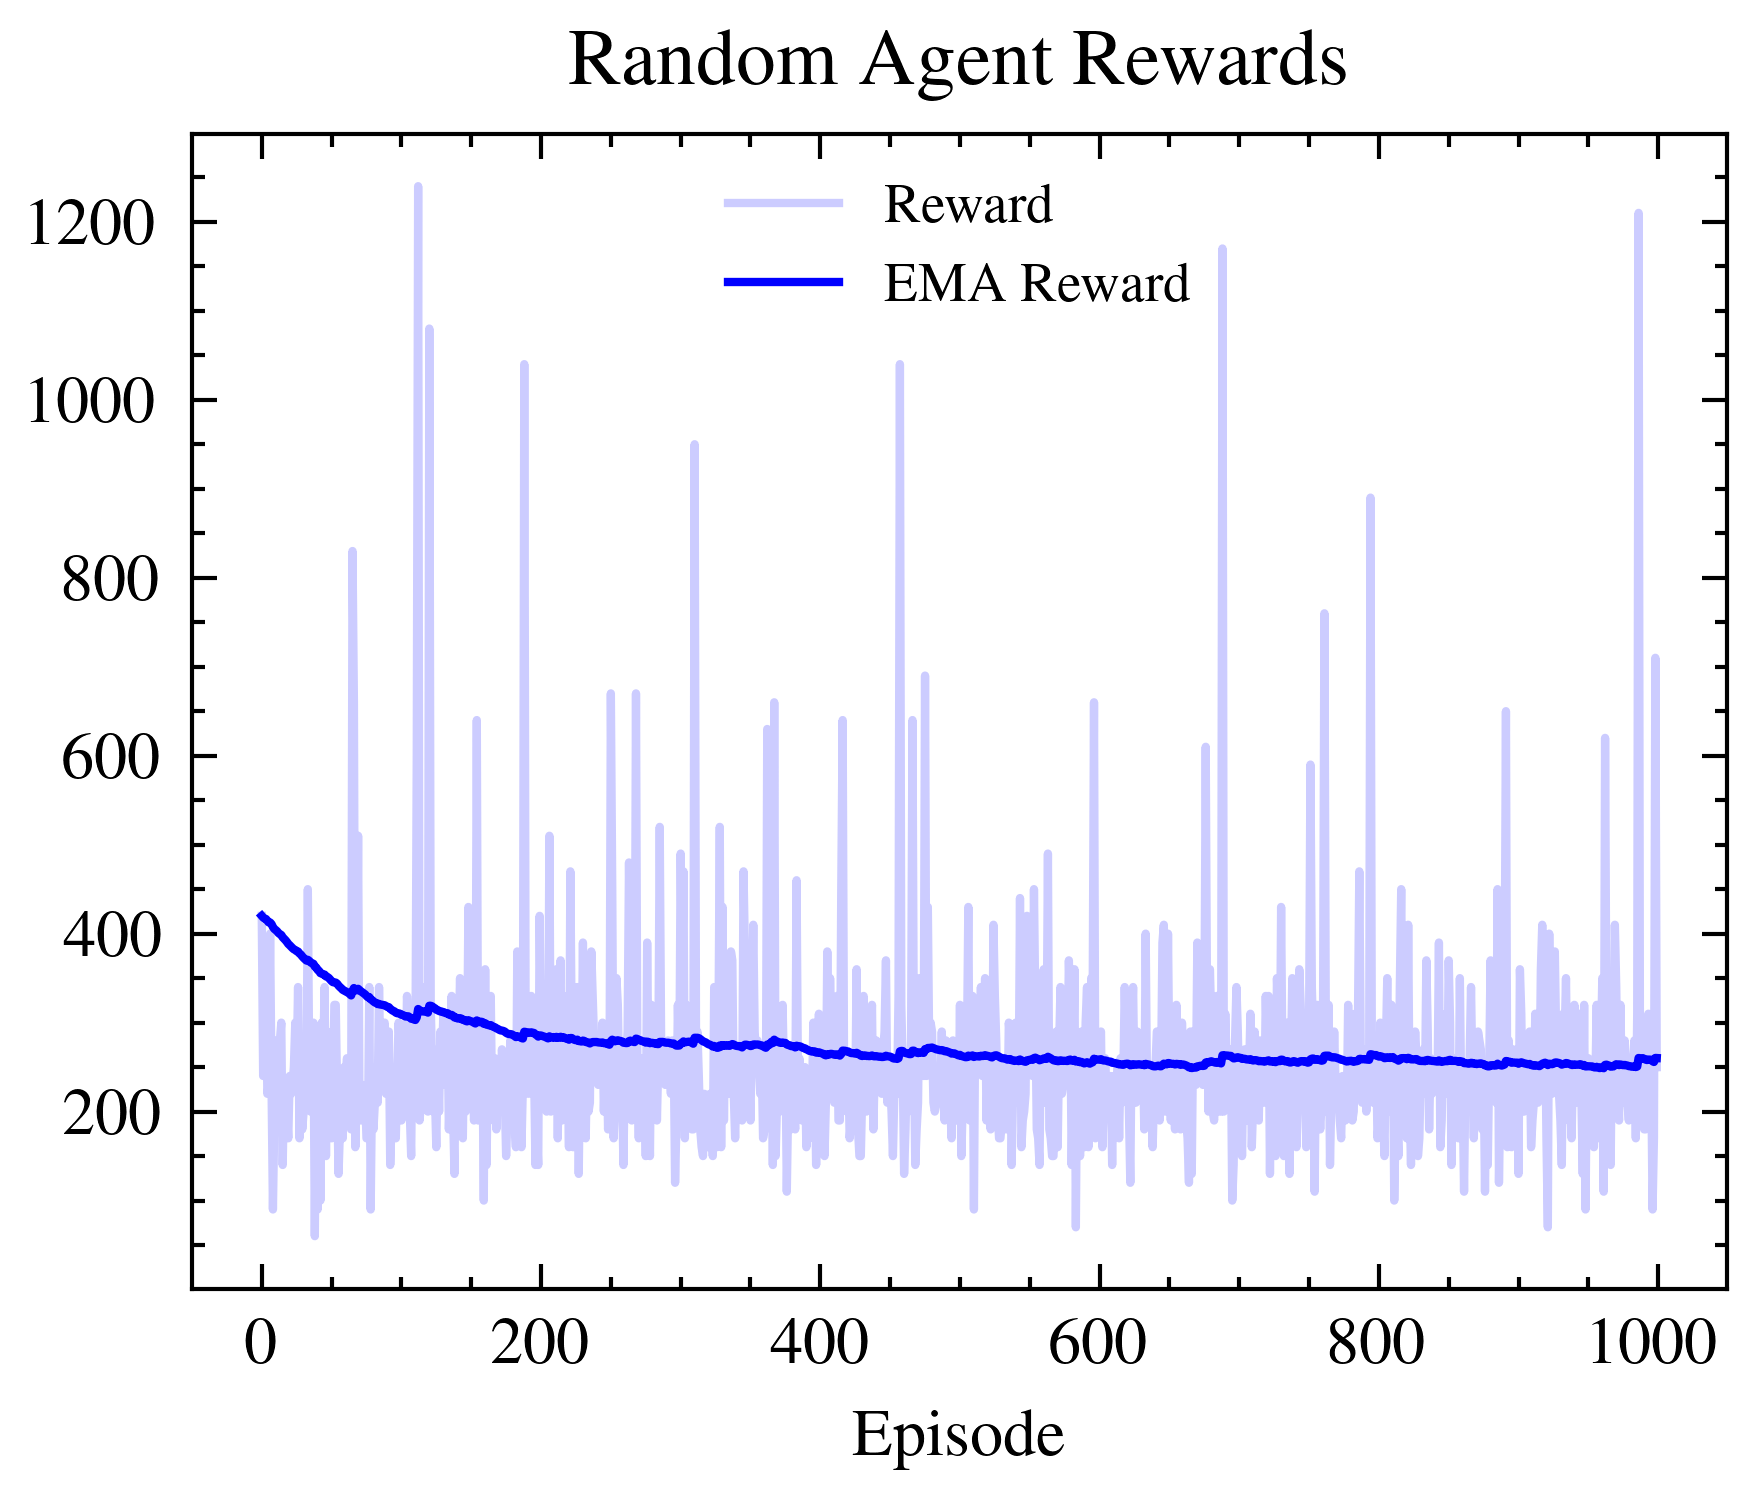

In [31]:
df = pd.read_csv('data/random_agent_results.csv')

df['EMA'] = df['reward'].ewm(alpha=0.01, adjust=False).mean()

plt.plot(range(len(df)), df['reward'], alpha=0.2, color='blue', label='Reward')
plt.plot(range(len(df)), df['EMA'], color='blue', linestyle='-', label='EMA Reward')
plt.legend(fontsize='small')
plt.title('Random Agent Rewards')
plt.xlabel('Episode')
plt.savefig('plots/random-agent-rewards.png', dpi=300)

## Plots for data from WandB

### PPO

In [32]:
DF_FILE = "data/ppo_results.csv"
REWARD_COLUMN = "episode_rewards"

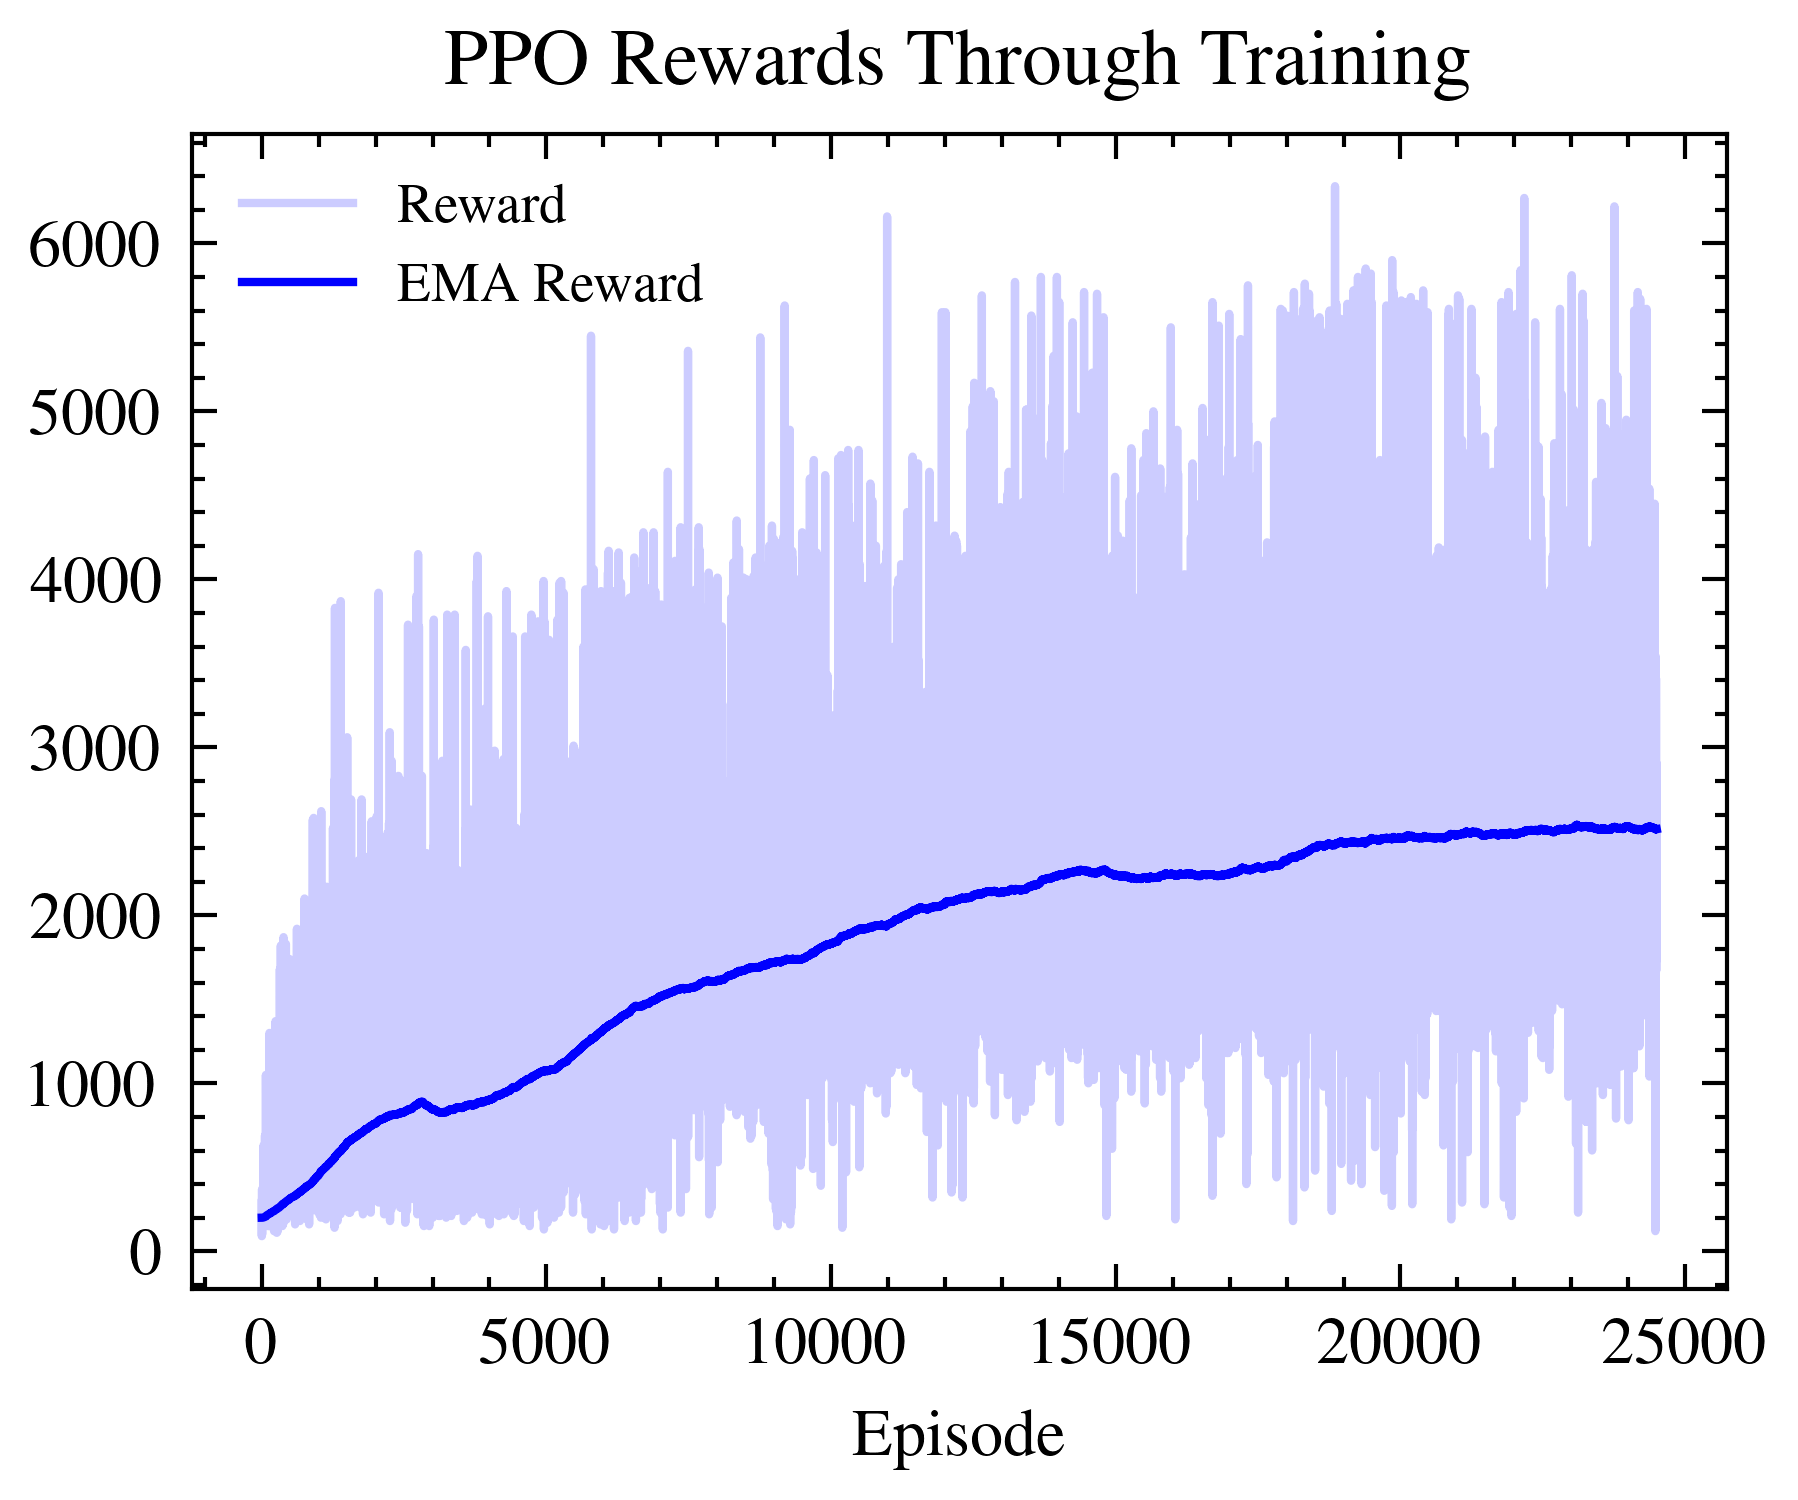

In [33]:
df = pd.read_csv(DF_FILE)

df['EMA'] = df[REWARD_COLUMN].ewm(alpha=0.001, adjust=False).mean()

plt.plot(range(len(df)), df[REWARD_COLUMN], alpha=0.2, color='blue', label='Reward')
plt.plot(range(len(df)), df['EMA'], color='blue', linestyle='-', label='EMA Reward')
plt.legend(fontsize='small')
plt.title('PPO Rewards Through Training')
plt.xlabel('Episode')
plt.savefig('plots/ppo-rewards.png', dpi=300)

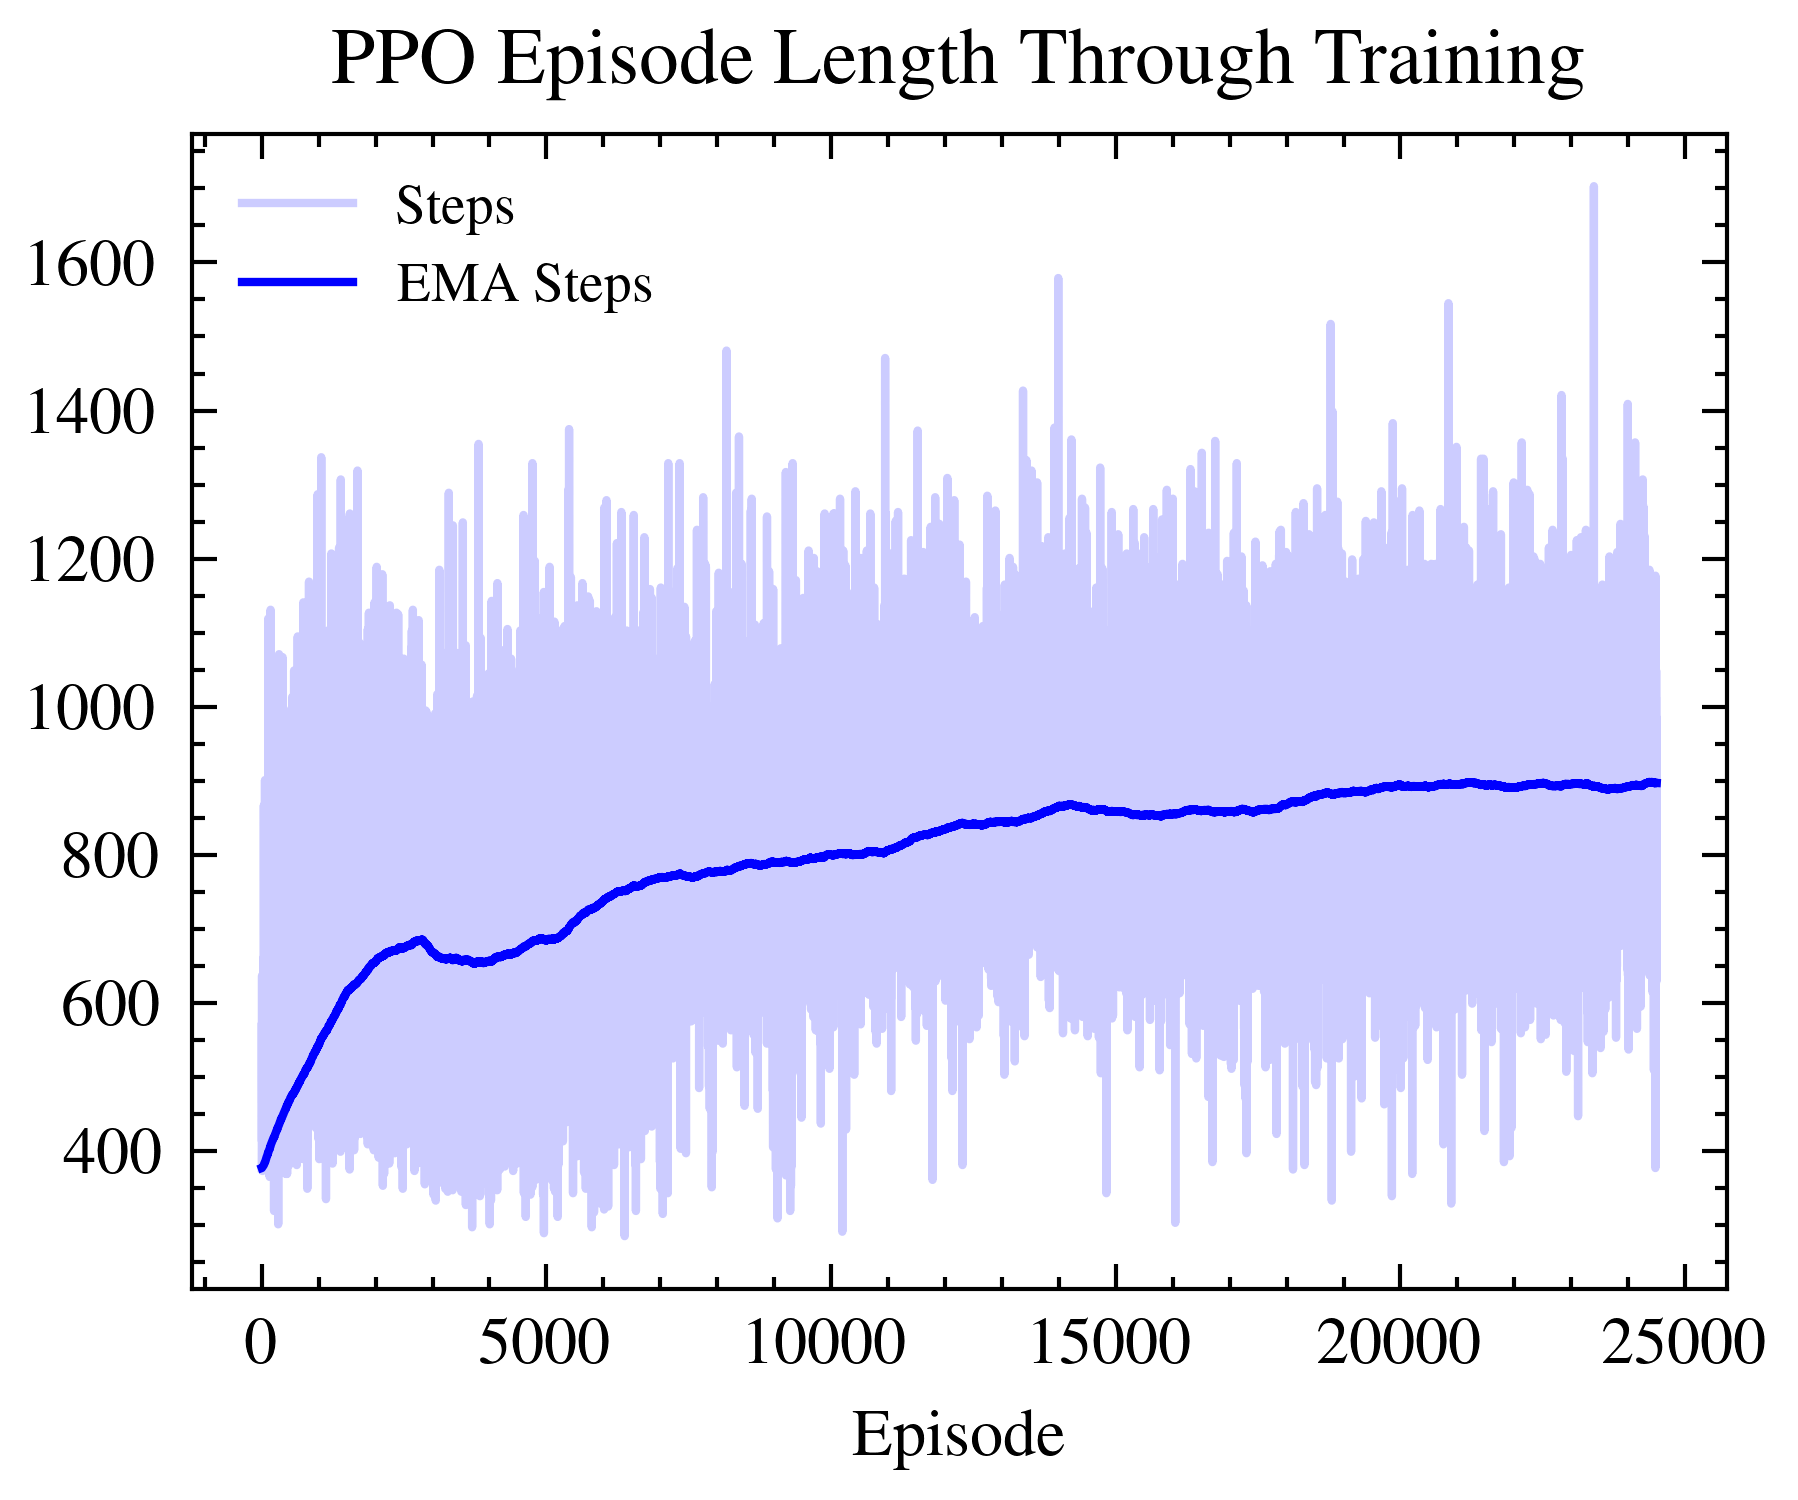

In [34]:
EPISODE_LENGTH_COLUMN = "episode_lengths"

df['EMA'] = df[EPISODE_LENGTH_COLUMN].ewm(alpha=0.001, adjust=False).mean()

plt.plot(range(len(df)), df[EPISODE_LENGTH_COLUMN], alpha=0.2, color='blue', label='Steps')
plt.plot(range(len(df)), df['EMA'], color='blue', linestyle='-', label='EMA Steps')
plt.legend(fontsize='small')
plt.title('PPO Episode Length Through Training')
plt.xlabel('Episode')
plt.savefig('plots/ppo-episode-length.png', dpi=300)

### MuZero

In [35]:
DF_FILE = "data/muzero_reward_actor_0.csv"
REWARD_COLUMN = "effortless-fog-273 - total_reward_actor_0"

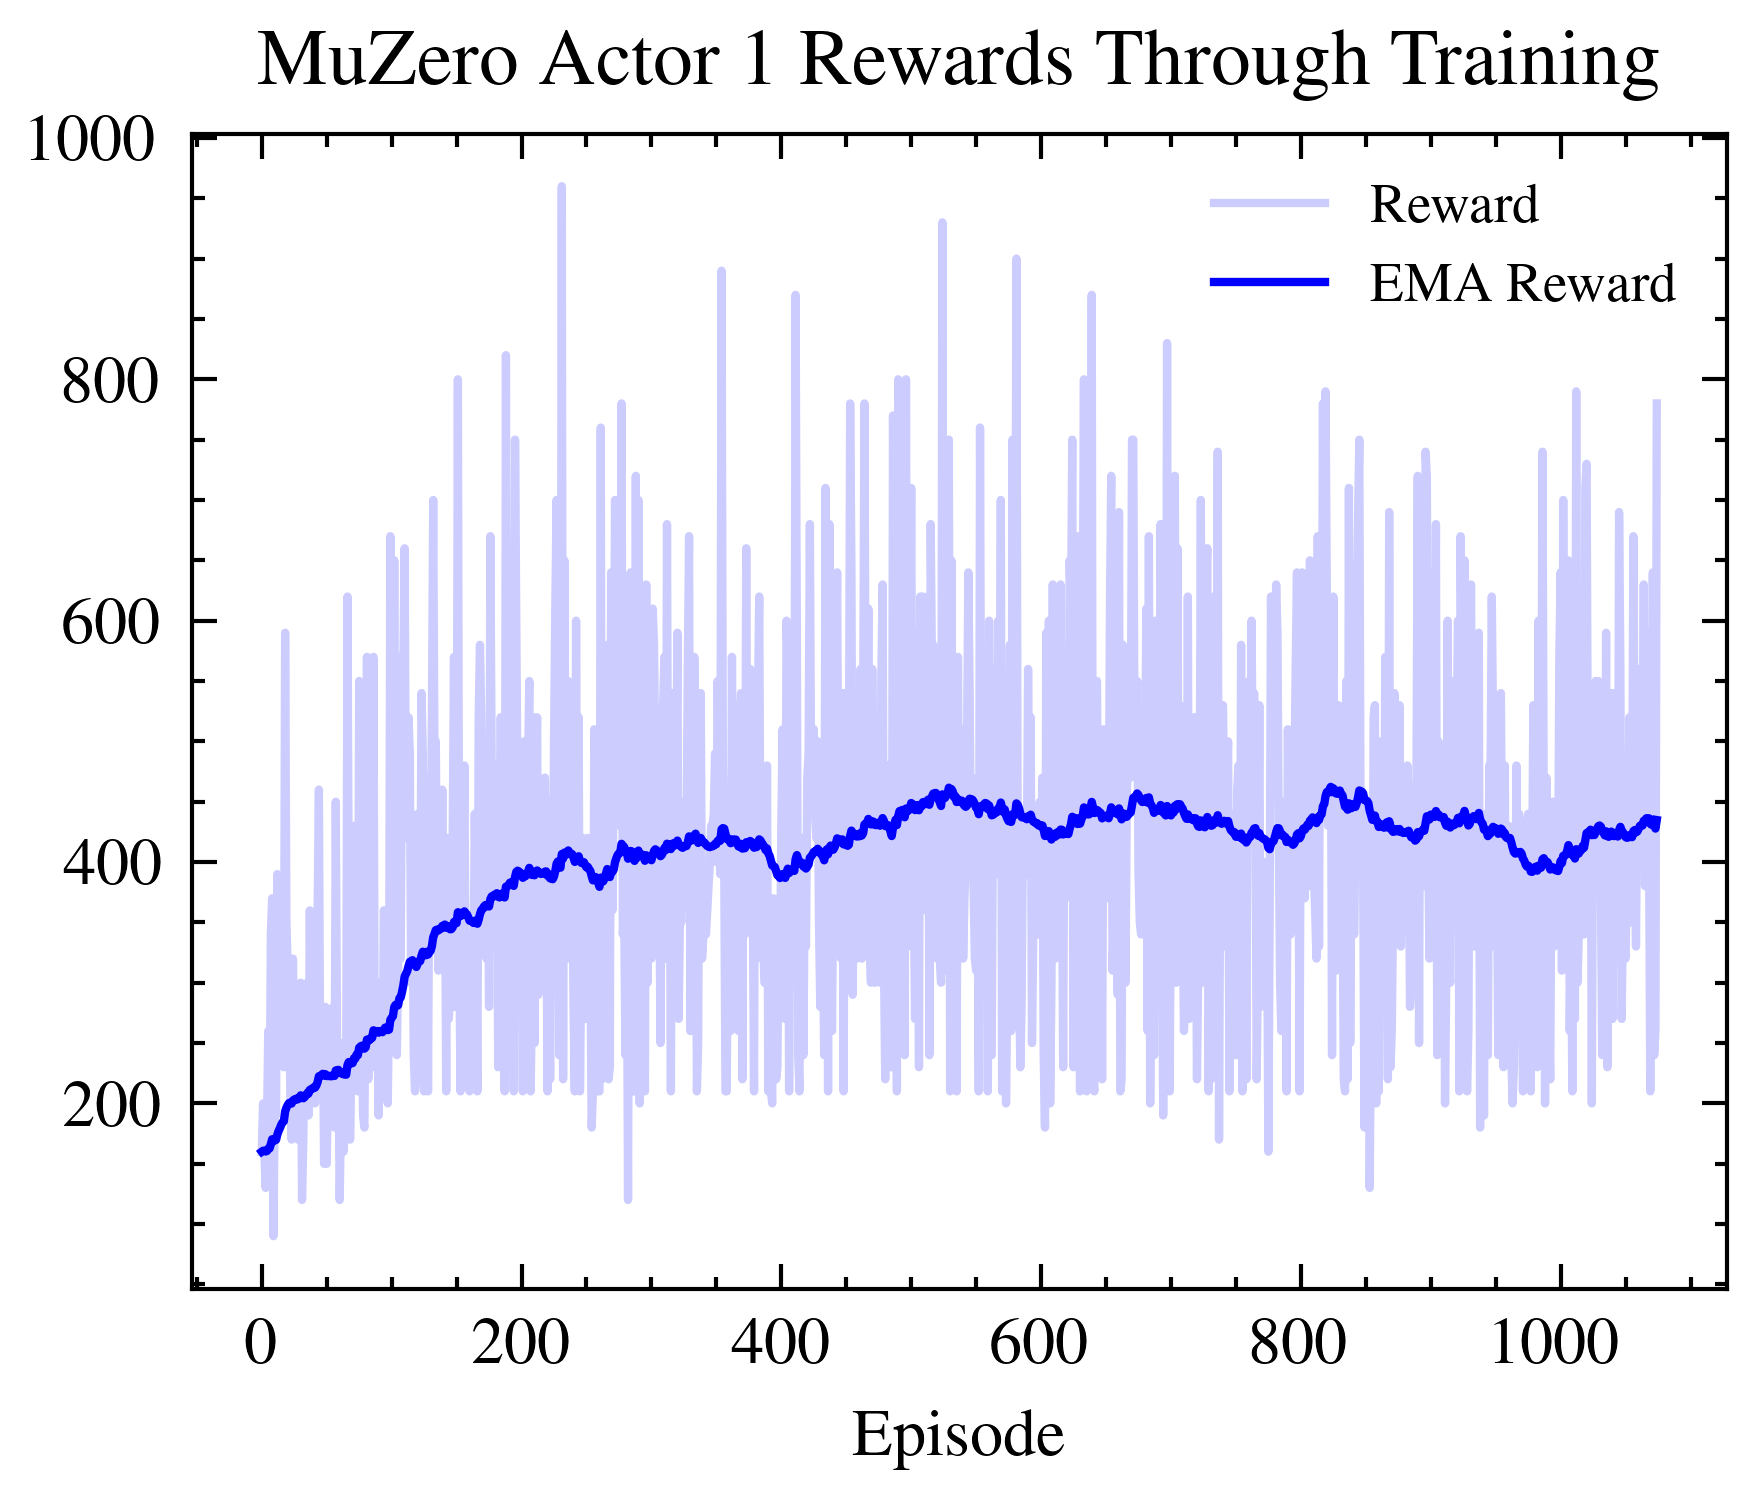

In [36]:
df = pd.read_csv(DF_FILE)

df['EMA'] = df[REWARD_COLUMN].ewm(alpha=0.02, adjust=False).mean()

plt.plot(range(len(df)), df[REWARD_COLUMN], alpha=0.2, color='blue', label='Reward')
plt.plot(range(len(df)), df['EMA'], color='blue', linestyle='-', label='EMA Reward')
plt.legend(fontsize='small')
plt.title('MuZero Actor 1 Rewards Through Training')
plt.xlabel('Episode')
plt.savefig('plots/muzero_reward_actor_0.png', dpi=300)

## Plots for data collected locally for DQN

In [37]:
REWARD_COLUMN = 'reward' 
df = pd.read_csv('../checkpoints/ddqn/smaller_min_epsilon_higher_discount_factor.csv', index_col=False)

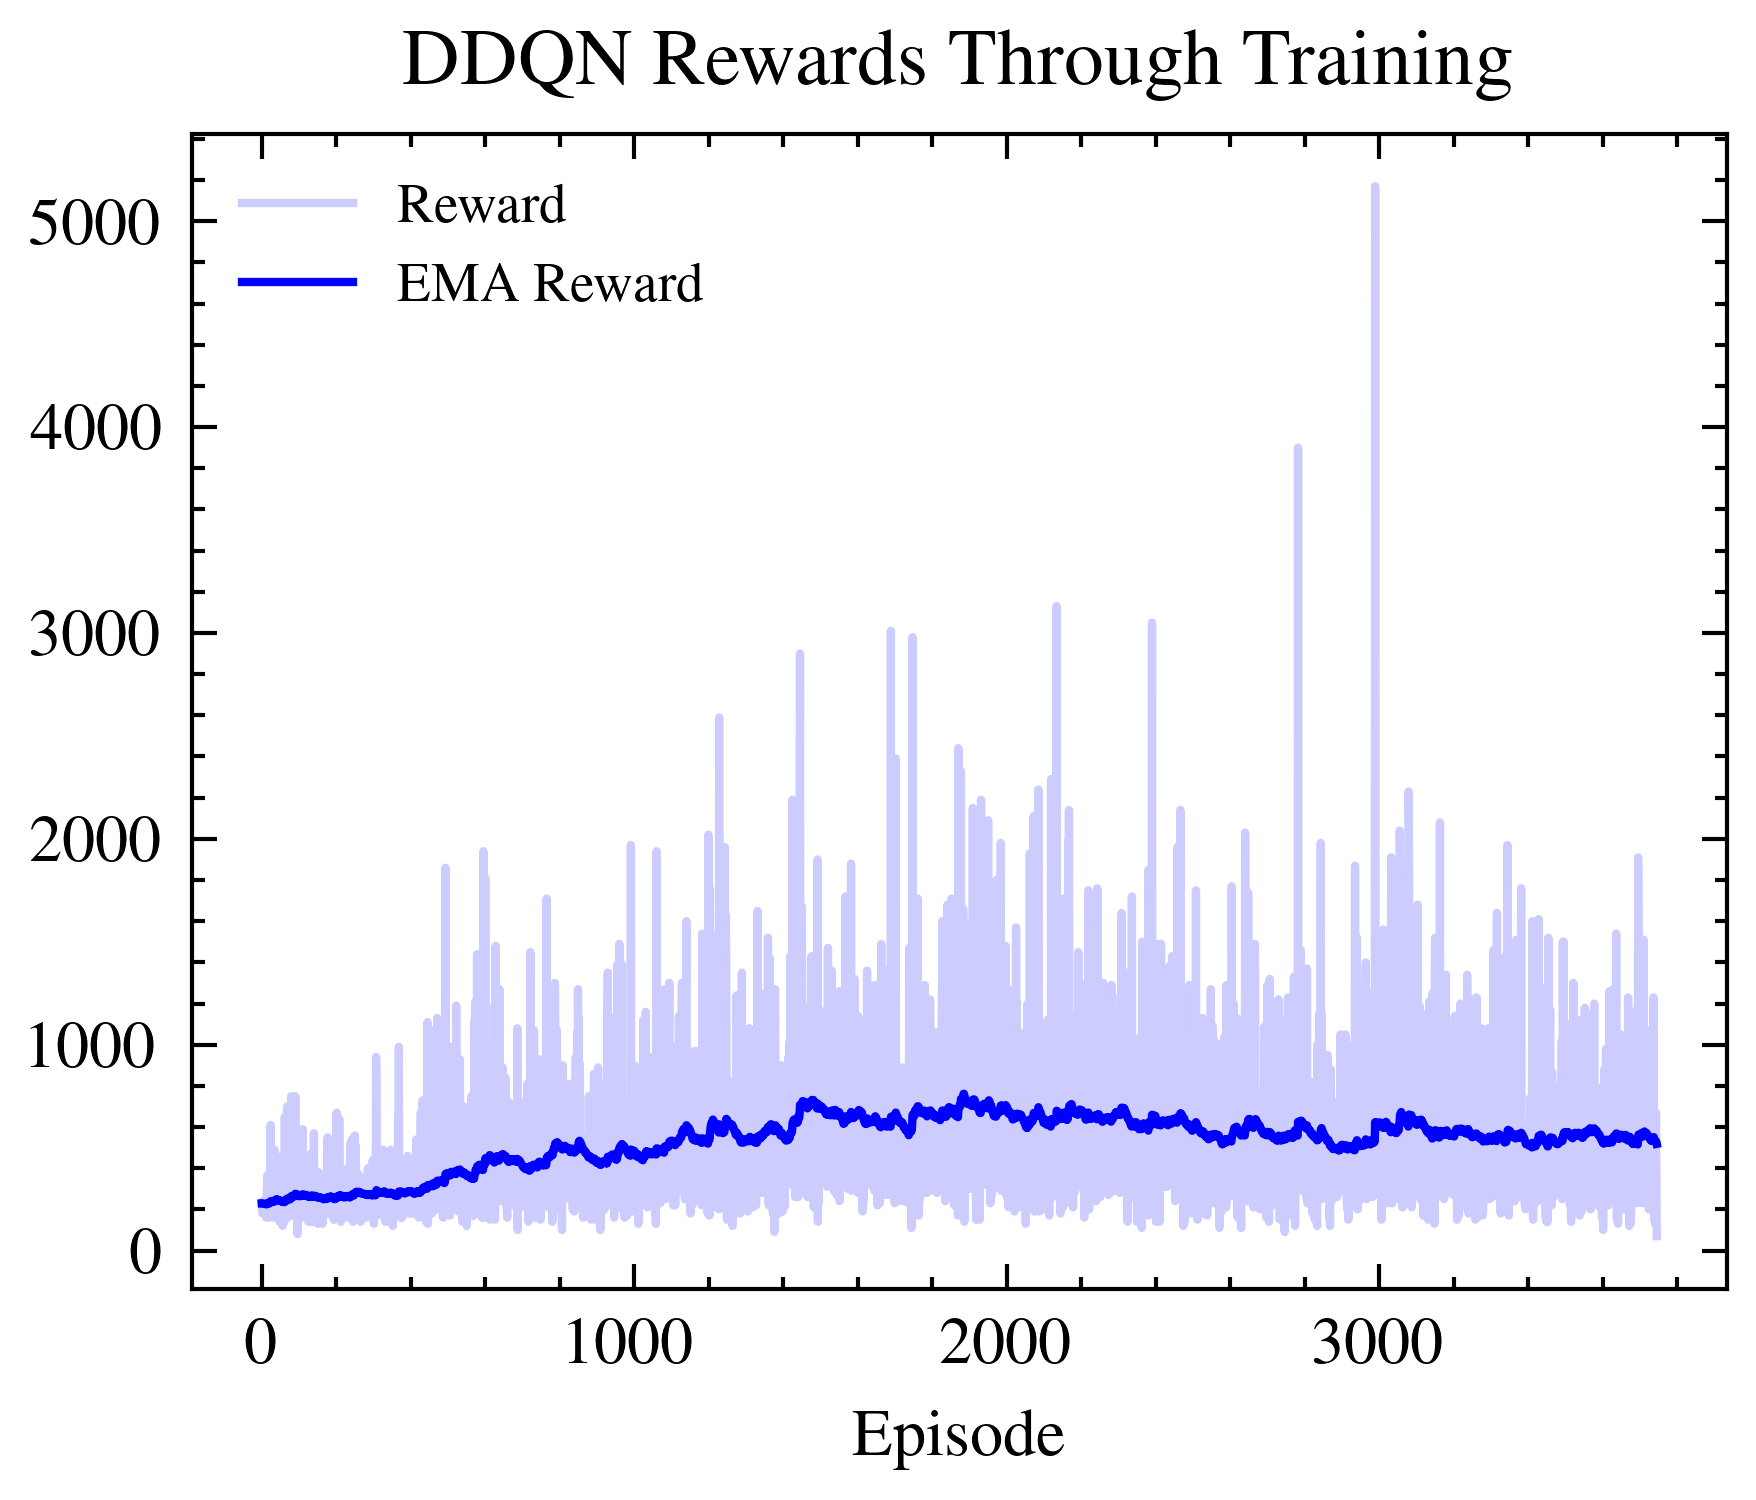

In [38]:
df = df.groupby('episode').sum()
df['EMA'] = df[REWARD_COLUMN].ewm(alpha=0.02, adjust=False).mean()

plt.plot(range(len(df)), df[REWARD_COLUMN], alpha=0.2, color='blue', label='Reward')
plt.plot(range(len(df)), df['EMA'], color='blue', linestyle='-', label='EMA Reward')
plt.legend(fontsize='small')
plt.title('DDQN Rewards Through Training')
plt.xlabel('Episode')
plt.savefig('plots/ddqn-rewards.png', dpi=300)

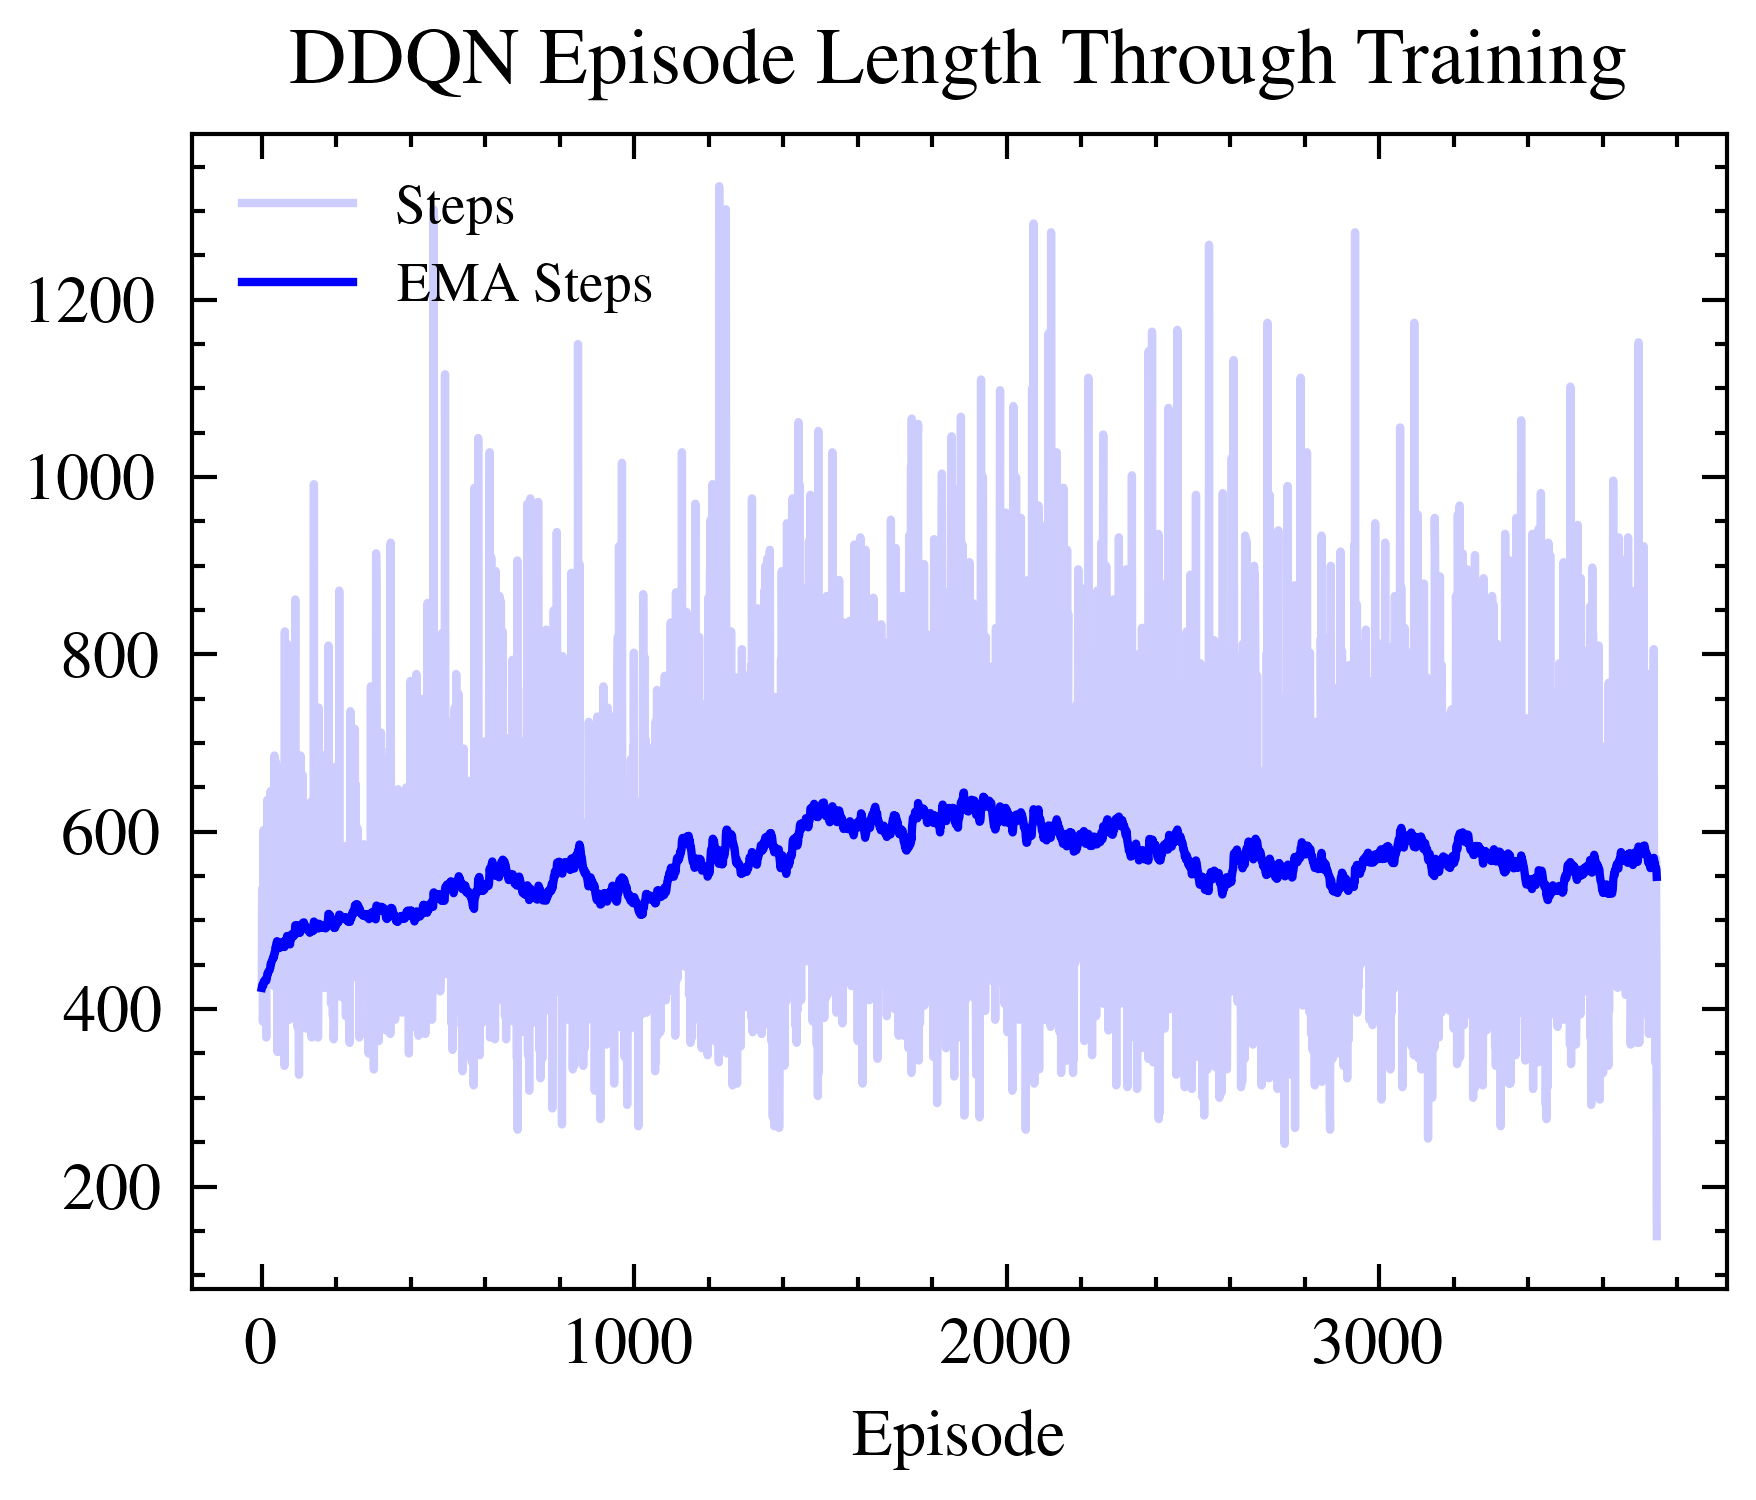

In [39]:
EPISODE_LENGTH_COLUMN = 'step'
df = pd.read_csv('../checkpoints/ddqn/smaller_min_epsilon_higher_discount_factor.csv', index_col=False)
df = df.groupby('episode').max()
df['EMA'] = df[EPISODE_LENGTH_COLUMN].ewm(alpha=0.02, adjust=False).mean()

plt.plot(range(len(df)), df[EPISODE_LENGTH_COLUMN], alpha=0.2, color='blue', label='Steps')
plt.plot(range(len(df)), df['EMA'], color='blue', linestyle='-', label='EMA Steps')
plt.legend(fontsize='small')
plt.title('DDQN Episode Length Through Training')
plt.xlabel('Episode')
plt.savefig('plots/ddqn-episode-length.png', dpi=300)